---
title: Error Analysis for Numerical Differentiation Schemes
venue: Modules
---

Let $k_n= 2 \pi n, \ n \in \mathbb{N}$. and the complex exponential $f(x)=\exp(i k_n \cdot x)=\exp(i2 \pi n \cdot x)$ be a test function with wave number $k_n$.  Then its exact derivative is given by $f'(x) = i k_n \exp(i2 \pi n \cdot x) = ik_n \cdot f(x)$.

<b>Different types of numerical errors: </b> 

Let $f'_*(x)$ be a numerical approximation for the exact derivative $f'(x)$. Then the ratio $r=f'_*(x)/f'(x)=f'_*(x)/(ik_n\cdot \exp(ik_n x))$ is a <b>complex</b> number. For an <b> exact </b> numerical approximation, we must have $r=1$.

Now assume that for any given numerical approximation, we have $r = d \cdot e^{i \theta} $, where $d,\theta$ are the magnitude and phase of the complex number $r$. Then $d$ is responsible for the error in magnitude of the numerical approximation, and $\theta$ is the phase error of the numerical scheme. For an exact scheme, we have $d=1, \ \theta=0$.



<b>Example 1 (Forward Differencing) :</b> Let $h$ be the step size. Then 

\begin{equation}
f_*'(x)=\frac{f(x+h)-f(x)}{h}=\frac{1}{h}(\exp(i k_n (x+h))-\exp(i k_n x))=\frac{1}{h}(\exp(i k_n h)-1) \cdot \exp(i k_n x) = \frac{1}{h}((\cos(k_nh)-1)+ i \sin(k_nh)) \cdot f(x)
\end{equation}

Thus, $r=\frac{1}{i k_n h}((\cos(k_nh)-1)+ i \sin(k_nh)) = d e^{i\theta}$, where $d= \frac{1}{k_n h}\sqrt{2-2\cos(k_n h)}$, and $\theta = \cot^{-1}\left(-\frac{\sin(k_nh)}{\cos(k_nh) -1)}\right)$.  It can be verified that for the numerical error, $d\rightarrow 1, \ \theta \rightarrow 0$ for small step size $h\rightarrow 0$ at a fixed wave number $k_n$. Thus the forward FD scheme is consistently approximating the exact derivative.

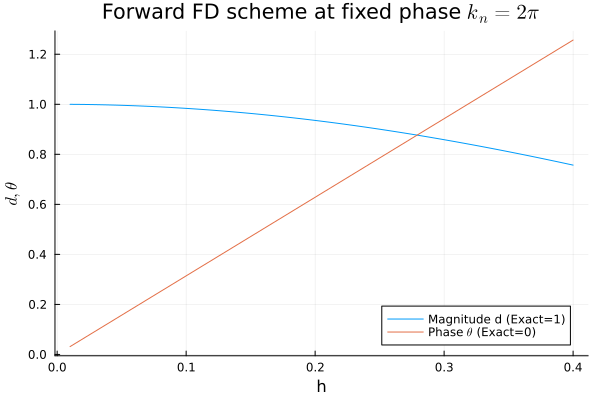

In [5]:
import Plots as Plt
import ApproxFun as af
import LaTeXStrings as ltx

# Generate wave numbers
kn = LinRange(2 * π, 20 * π , 11)

# Generate step sizes
h = LinRange(0.01, 0.4, 100)

#Calculate magnitude and phase of numerical error for FD at fixed k
k0 = 2 * π

mag_n_fd1 = 1 ./(k0 .* h) .* sqrt.(2 .- 2 * cos.(k0 .* h))
theta_n_fd1 = acot.(-sin.(k0 .* h) ./ (cos.(k0 .* h) .- 1.0))

# Plot the results
Plt.plot(h, mag_n_fd1, label="Magnitude d (Exact=1)")
Plt.plot!(h, theta_n_fd1, label=ltx.L"Phase $\theta$ (Exact=0)")
Plt.title!(ltx.L"Forward FD scheme at fixed phase $k_n=2\pi$")
Plt.xlabel!("h")
Plt.ylabel!(ltx.L"d,\theta")

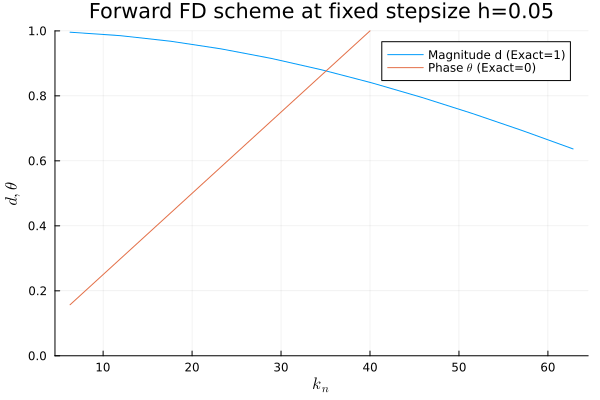

In [6]:
# Plot error as function of wave number k for fixed step size
h0 = 0.05
mag_n = 1 ./ (kn .* h0) .* sqrt.(2 .- 2 * cos.(kn .* h0))
theta_n = acot.(-sin.(kn .* h0) ./ (cos.(kn .* h0) .- 1.0))

# Plot the results
Plt.plot(kn, mag_n, label="Magnitude d (Exact=1)")
Plt.plot!(kn, theta_n, label=ltx.L"Phase $\theta$ (Exact=0)")
Plt.title!("Forward FD scheme at fixed stepsize h=0.05")
Plt.ylims!(0, 1)
Plt.xlabel!(ltx.L"k_n")
Plt.ylabel!(ltx.L"d,\theta")

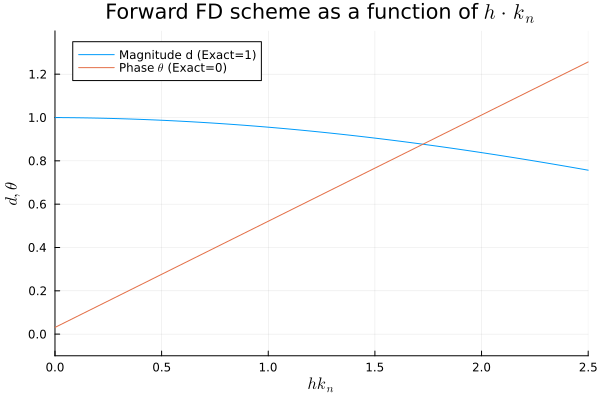

In [7]:
# Plot error as function of wave number - stepsize product h*k_n 
hk = LinRange(0.001, 2.5, 100)

mag_n_fd = 1 ./ (k0 .* h) .* sqrt.(2 .- 2 * cos.(k0 .* h))
theta_n_fd = acot.(-sin.(k0 .* h) ./ (cos.(k0 .* h) .- 1.0))

# Plot the results
Plt.plot(hk, mag_n_fd,label="Magnitude d (Exact=1)")
Plt.plot!(hk, theta_n_fd, label=ltx.L"Phase $\theta$ (Exact=0)")
Plt.title!(ltx.L"Forward FD scheme as a function of $h\cdot k_n$")
Plt.xlabel!(ltx.L"$hk_n$")
Plt.ylabel!(ltx.L"d,\theta")
Plt.ylims!(-0.1, 1.4)
Plt.xlims!(0.0, 2.5)

<b>Example 2 (2nd order Central Differencing) :</b> Let $h$ be the step size. Then for $f(x)=\exp(i k_n \cdot x)=\exp(i2 \pi n \cdot x)$, the CD approximation $f_*'(x)$ is

\begin{equation}
f_*'(x)=\frac{f(x+h)-f(x-h)}{2h}=\frac{1}{2h}(\exp(i k_n (x+h))-\exp(i k_n (x-h)))=\frac{1}{2h}(\exp(i k_n h)-\exp(-i k_n h)) \cdot \exp(i k_n x) = \frac{1}{h}i\sin(k_nh) \cdot f(x)
\end{equation}

Thus, $r=\frac{1}{i k_n h}( i \sin(k_nh)) = d e^{i\theta}$, where $d= \frac{1}{k_n h}\sin(k_n h)$, and $\theta =0 $.   It can be verified that for the numerical error, $d\rightarrow 1$ for small step size $h\rightarrow 0$, at a fixed wave number $k_n$. Thus the CD scheme is consistently approximating the exact derivative.

In [8]:
# Evaluate CD derivative at x=1.0
x0 = 1.0
CD_diff(h, k) = (exp.(im * k * (x0 + h)) .- exp.(im * (k * (x0 - h)))) ./ (2 .*h);

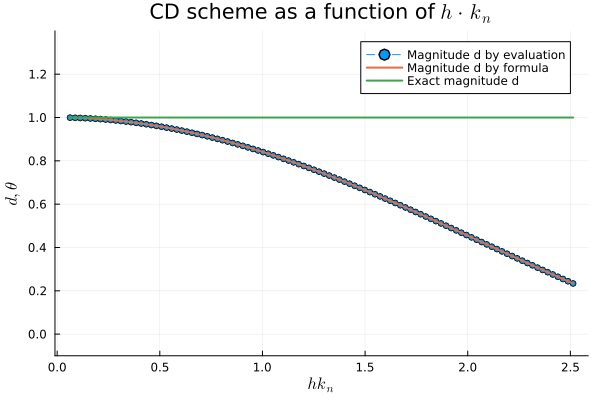

In [10]:
# Calculate numerical error directly from the ratio between approximation and exact value at x=1.0
ratio = CD_diff.(h, k0) ./ (im * k0 * exp.(im * k0)) # complex ratio 
k0 = 2 * π


mag_n_cd = abs.(ratio) # error amplification is magnitude of complex ratio
#Caution: If the polar angle is larger than Pi/2, then the amplification is negative!

theta_n_cd = abs.(angle.(ratio)) # phase error is polar angle of complex ratio, modulo Pi since exp(i*Pi)=-1

# Plot the results
Plt.plot(k0 * h, mag_n_cd, m=:o, ms=3, l=:dash, label="Magnitude d by evaluation")
Plt.plot!(k0 * h, sin.(k0 * h) ./ (k0 * h), lw=2, label="Magnitude d by formula")
Plt.plot!(k0 * h, ones(length(h)), lw=2, label="Exact magnitude d ")
#Plt.plot!(k0*h,theta_n_cd,label="Phase error")
Plt.title!(ltx.L"CD scheme as a function of $h\cdot k_n$")
Plt.xlabel!(ltx.L"$hk_n$")
Plt.ylabel!(ltx.L"d,\theta")
Plt.ylims!(-0.1, 1.4)

<b> Example 3: </b> The  2nd order forward-differencing scheme is defined as  
\begin{equation}
f'_*(x)=\frac{-3f(x)+4f(x+h)-f(x+2h)}{2h}
\end{equation}



In [11]:
# Evaluate 2nd order FD derivative at x=1.0
x0 = 1.0
FD2_diff(h, k) = (-3 * exp.(im * k * x0) .+ 4 * exp.(im * k * (x0 + h)) -  exp.(im * k * (x0 + (2 * h))) ) ./ (2 .* h);

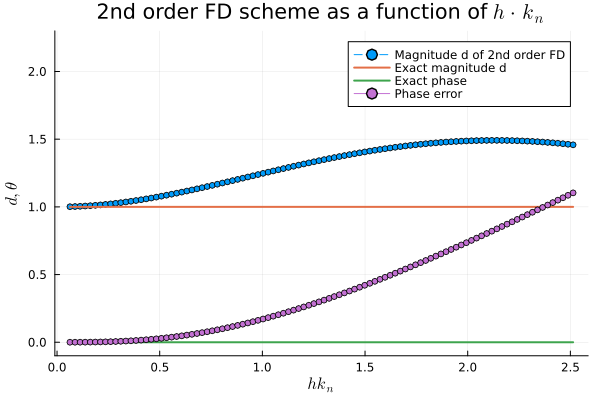

In [12]:
# Calculate numerical error directly from the ratio between approximation and exact value at x=1.0
# h = LinRange(0.01, 1.0, 100)
k0 = 2 * π
x0 = 1.0
ratio_fd2 = FD2_diff.(h, k0) ./ (im * k0 * x0 * exp.(im * k0 * x0) ) # complex ratio 

mag_n_fd2 = abs.(ratio_fd2) # error amplification is magnitude of complex ratio
#Caution: If the polar angle is larger than Pi/2, then the amplification is negative!

theta_n_fd2 = abs.(angle.(ratio_fd2)) # phase error is polar angle of complex ratio, modulo Pi since exp(i*Pi)=-1

# Plot the results
Plt.plot(h * k0, mag_n_fd2, m=:o, ms=3, l=:dash, label="Magnitude d of 2nd order FD")
Plt.plot!(h * k0, ones(length(h)), lw=2, label="Exact magnitude d")
Plt.plot!(h * k0, zeros(length(h)), lw=2, label="Exact phase")
Plt.plot!(h * k0, theta_n_fd2, m=:o, ms=3, label="Phase error")
Plt.title!(ltx.L"2nd order FD scheme as a function of $h\cdot k_n$")
Plt.xlabel!(ltx.L"$hk_n$")
Plt.ylabel!(ltx.L"d,\theta")
Plt.ylims!(-0.1, 2.3)

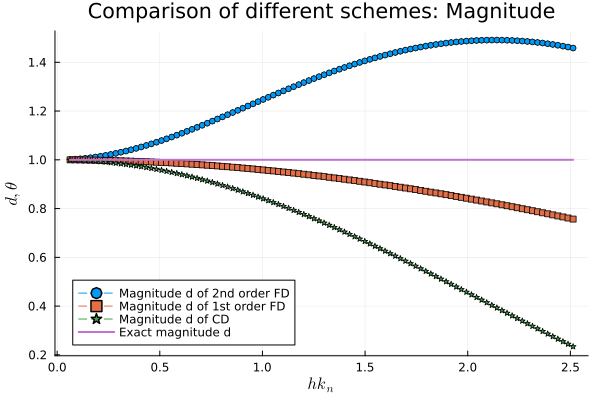

In [13]:
Plt.plot(h * k0, mag_n_fd2, m=:o, ms=3, l=:dash, label="Magnitude d of 2nd order FD")
Plt.plot!(h * k0, mag_n_fd1, m=:r, ms=3, l=:dash, label="Magnitude d of 1st order FD")
Plt.plot!(h * k0, mag_n_cd, m=:s, ms=3, l=:dash, label="Magnitude d of CD")
Plt.plot!(h * k0, ones(length(h)), lw=2, label="Exact magnitude d", legend=:bottomleft)

# Plt.plot!(h * k0, zeros(length(h)), lw=2, label="Exact phase")
# Plt.plot!(h * k0, theta_n_fd2, m=:o, ms=3, label="Phase error")

Plt.title!("Comparison of different schemes: Magnitude")
Plt.xlabel!(ltx.L"$hk_n$")
Plt.ylabel!(ltx.L"d,\theta")

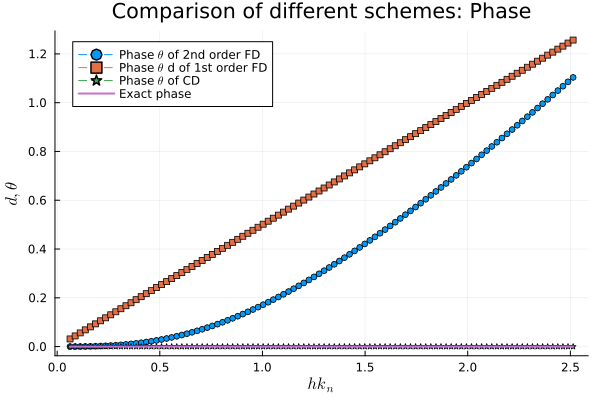

In [14]:
Plt.plot(h * k0, theta_n_fd2, m=:o, ms=3, l=:dash, label=ltx.L"Phase $\theta$ of 2nd order FD")
Plt.plot!(h * k0, theta_n_fd1, m=:r, ms=3, l=:dash, label=ltx.L"Phase $\theta$ d of 1st order FD")
Plt.plot!(h * k0, theta_n_cd, m=:s, ms=3, l=:dash, label=ltx.L"Phase $\theta$ of CD")
Plt.plot!(h * k0, zeros(length(h)), lw=2, label="Exact phase")

# Plt.plot!(h * k0, zeros(length(h)), lw=2, label="Exact phase")
# Plt.plot!(h * k0, theta_n_fd2, m=:o, ms=3, label="Phase error")

Plt.title!("Comparison of different schemes: Phase")
Plt.xlabel!(ltx.L"$hk_n$")
Plt.ylabel!(ltx.L"d,\theta")

# In-class Assignments

The  4th order central-differencing scheme is defined as  
\begin{equation}
f'_*(x)=\frac{f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)}{12h}
\end{equation}

For the same step sizes and wave numbers as above, plot the error amplification and phase errors of the scheme as a function of $hk_n$ at $x=1.0$. Show your results in the same plot with the 2nd order central differencing scheme and 2nd order forward differencing scheme. How do these schemes compare with each other?

In [19]:
# Evaluate CD derivative at x=1.0
CD_diff_4(h, k) = (exp.(im * k * (x0 - 2 * h)) .- 8 * exp.(im * k * (x0 - h)) .+ 8 * exp.(im * k * (x0 + h)) .- exp.(im * k * (x0 + (2 * h)))) ./ (12 .* h);

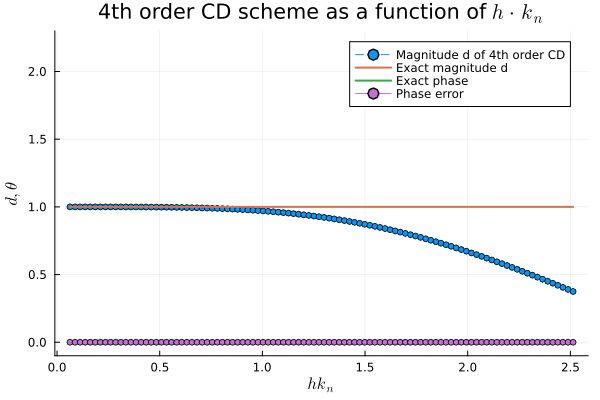

In [24]:
ratio_cd4 = CD_diff_4.(h, k0) ./ (im * k0 * x0 * exp.(im * k0 * x0))

mag_n_cd4 = abs.(ratio_cd4)
theta_n_cd4 = abs.(angle.(ratio_cd4))

# Plot the results
Plt.plot(h * k0, mag_n_cd4, m=:o, ms=3, l=:dash, label="Magnitude d of 4th order CD")
Plt.plot!(h * k0, ones(length(h)), lw=2, label="Exact magnitude d")
Plt.plot!(h * k0, zeros(length(h)), lw=2, label="Exact phase")
Plt.plot!(h * k0, theta_n_cd4, m=:o, ms=3, label="Phase error")
Plt.title!(ltx.L"4th order CD scheme as a function of $h\cdot k_n$")
Plt.xlabel!(ltx.L"$hk_n$")
Plt.ylabel!(ltx.L"d,\theta")
Plt.ylims!(-0.1, 2.3)

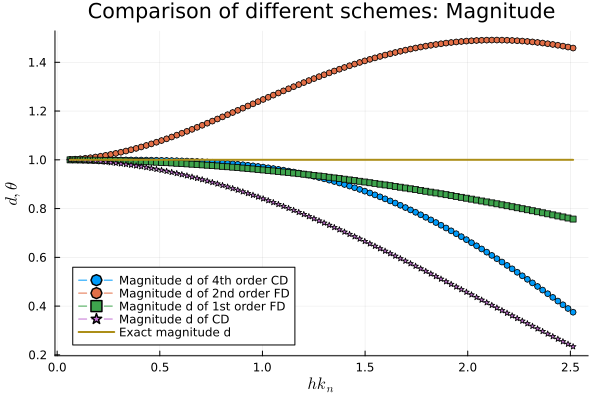

In [38]:
Plt.plot(h * k0, mag_n_cd4, m=:o, ms=3, l=:dash, label="Magnitude d of 4th order CD")
Plt.plot!(h * k0, mag_n_fd2, m=:o, ms=3, l=:dash, label="Magnitude d of 2nd order FD")
Plt.plot!(h * k0, mag_n_fd1, m=:r, ms=3, l=:dash, label="Magnitude d of 1st order FD")
Plt.plot!(h * k0, mag_n_cd, m=:s, ms=3, l=:dash, label="Magnitude d of CD")
Plt.plot!(h * k0, ones(length(h)), lw=2, label="Exact magnitude d", legend=:bottomleft)

# Plt.plot!(h * k0, zeros(length(h)), lw=2, label="Exact phase")
# Plt.plot!(h * k0, theta_n_fd2, m=:o, ms=3, label="Phase error")

Plt.title!("Comparison of different schemes: Magnitude")
Plt.xlabel!(ltx.L"$hk_n$")
Plt.ylabel!(ltx.L"d,\theta")

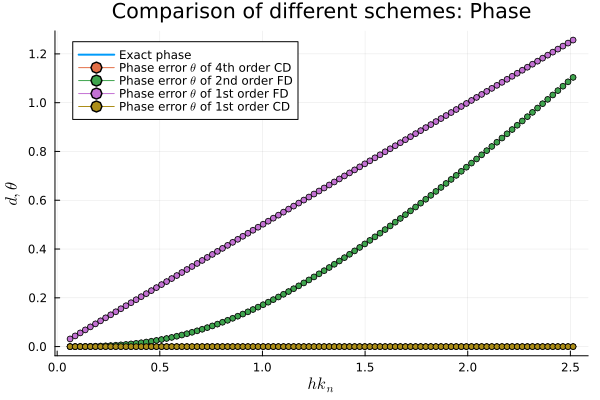

In [37]:
Plt.plot(h * k0, zeros(length(h)), lw=2, label="Exact phase")
Plt.plot!(h * k0, theta_n_cd4, m=:o, ms=3, label=ltx.L"Phase error $\theta$ of 4th order CD")
Plt.plot!(h * k0, theta_n_fd2, m=:o, ms=3, label=ltx.L"Phase error $\theta$ of 2nd order FD")
Plt.plot!(h * k0, theta_n_fd1, m=:o, ms=3, label=ltx.L"Phase error $\theta$ of 1st order FD")
Plt.plot!(h * k0, theta_n_cd, m=:o, ms=3, label=ltx.L"Phase error $\theta$ of 1st order CD", legend=:topleft)

Plt.title!("Comparison of different schemes: Phase")
Plt.xlabel!(ltx.L"$hk_n$")
Plt.ylabel!(ltx.L"d,\theta")